In [1]:
import numpy as np
import pandas as pd 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [2]:
os.chdir('C:/Users/rodri/Desktop/NCFS2/DistComp/proj2')

In [3]:
csv_file = "./uber_all_processed.csv"
df= pd.read_csv(csv_file,sep=',')

In [4]:
df.head()

,datetime,lat,lon,base,locationID,borough,zone
0,2014-04-01 00:00:00,40.7188,-73.9863,B02598,232,Manhattan,Two Bridges/Seward Park
1,2014-04-01 00:00:00,40.7637,-73.9600,B02598,141,Manhattan,Lenox Hill West
2,2014-04-01 00:00:00,40.7215,-73.9952,B02682,144,Manhattan,Little Italy/NoLiTa
3,2014-04-01 00:01:00,40.7355,-73.9966,B02617,113,Manhattan,Greenwich Village North
4,2014-04-01 00:02:00,40.7184,-73.9601,B02682,255,Brooklyn,Williamsburg (North Side)


creating date column

In [5]:
df['date']=pd.to_datetime(df['datetime']).dt.date


In [6]:
csv_file = "./US Bank holidays"
hdays = pd.read_csv(csv_file,sep=',')

In [7]:
hdays = hdays.drop(['id'],axis=1)

Getting holidays for 2014 and 2015 will change in final version

In [8]:
hdays_1415 = hdays[(hdays['date'] >= '2014-01-01') & (hdays['date'] <= '2015-12-31')]

In [30]:
hdays_1415

,date,holiday
20,2014-01-01,New Year Day
21,2014-01-20,Martin Luther King Jr. Day
22,2014-02-17,Presidents Day (Washingtons Birthday)
23,2014-05-26,Memorial Day
24,2014-07-04,Independence Day
25,2014-09-01,Labor Day
26,2014-10-13,Columbus Day
27,2014-11-11,Veterans Day
28,2014-11-27,Thanksgiving Day
29,2014-12-25,Christmas Day


In [11]:
hdays_1415['date'] = hdays_1415['date'].astype(str).str.strip()

In [12]:
df['date'] = df['date'].astype(str).str.strip()

In [13]:
df["count"] = 1

In [14]:
dfhdays = df.merge(hdays_1415,left_on='date',right_on='date',how='left')
dfhdays.head()

,datetime,lat,lon,base,locationID,borough,zone,date,count,holiday
0,2014-04-01 00:00:00,40.7188,-73.9863,B02598,232,Manhattan,Two Bridges/Seward Park,2014-04-01,1,NaN
1,2014-04-01 00:00:00,40.7637,-73.9600,B02598,141,Manhattan,Lenox Hill West,2014-04-01,1,NaN
2,2014-04-01 00:00:00,40.7215,-73.9952,B02682,144,Manhattan,Little Italy/NoLiTa,2014-04-01,1,NaN
3,2014-04-01 00:01:00,40.7355,-73.9966,B02617,113,Manhattan,Greenwich Village North,2014-04-01,1,NaN
4,2014-04-01 00:02:00,40.7184,-73.9601,B02682,255,Brooklyn,Williamsburg (North Side),2014-04-01,1,NaN


In [15]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [16]:
dfhdays = dfhdays.dropna()

In [17]:
dfhdays["datetime"] = pd.to_datetime(dfhdays["datetime"])
dfhdays.head()

,datetime,lat,lon,base,locationID,borough,zone,date,count,holiday
1077836,2014-05-26,40.7407,-74.0077,B02682,158,Manhattan,Meatpacking/West Village West,2014-05-26,1,Memorial Day
1077837,2014-05-26,40.7573,-73.9778,B02598,161,Manhattan,Midtown Center,2014-05-26,1,Memorial Day
1077838,2014-05-26,40.7572,-73.9696,B02682,229,Manhattan,Sutton Place/Turtle Bay North,2014-05-26,1,Memorial Day
1077839,2014-05-26,40.7297,-73.9598,B02682,112,Brooklyn,Greenpoint,2014-05-26,1,Memorial Day
1077840,2014-05-26,40.7349,-73.9920,B02682,113,Manhattan,Greenwich Village North,2014-05-26,1,Memorial Day


# New Year Day

Looking at New Year's Day traveling working off of Melanie's time series plots

In [18]:
newyear = dfhdays[(dfhdays['holiday']=='New Year Day')&(dfhdays['date']=='2015-01-01')]
newyear.head()

,datetime,lat,lon,base,locationID,borough,zone,date,count,holiday
4443251,2015-01-01 00:00:05,40.7188,-73.9574,B02764,255,Brooklyn,Williamsburg (North Side),2015-01-01,1,New Year Day
4443252,2015-01-01 00:00:05,40.7209,-73.9969,B02598,144,Manhattan,Little Italy/NoLiTa,2015-01-01,1,New Year Day
4443253,2015-01-01 00:00:08,40.7326,-73.9943,B02682,113,Manhattan,Greenwich Village North,2015-01-01,1,New Year Day
4443254,2015-01-01 00:00:11,40.7403,-73.9905,B02617,234,Manhattan,Union Sq,2015-01-01,1,New Year Day
4443255,2015-01-01 00:00:13,40.7147,-73.9830,B02764,232,Manhattan,Two Bridges/Seward Park,2015-01-01,1,New Year Day


In [19]:
total_per_hour = newyear[["datetime", "count"]].groupby([newyear["datetime"].dt.hour]).sum()
total_per_hour.head()

,count
datetime,
0,6166
1,5742
2,6841
3,5619
4,3375


In [20]:
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31

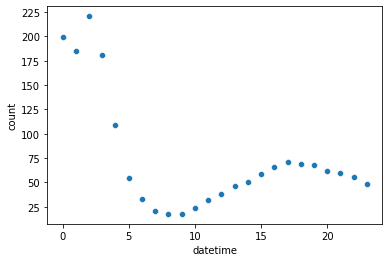

In [21]:
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")
plt.show()

In [32]:
dayafterNY = df[(df['date'] >= '2015-01-02') & (df['date'] < '2015-01-03')]

In [33]:
dayafterNY.head()

,datetime,lat,lon,base,locationID,borough,zone,date,count
4501300,2015-01-02 00:00:04,40.7744,-73.8736,B02764,138,Queens,LaGuardia Airport,2015-01-02,1
4501301,2015-01-02 00:00:04,40.7009,-73.9712,B02617,34,Brooklyn,Brooklyn Navy Yard,2015-01-02,1
4501302,2015-01-02 00:00:07,40.7120,-74.0161,B02682,13,Manhattan,Battery Park City,2015-01-02,1
4501303,2015-01-02 00:00:07,40.7189,-73.9909,B02617,148,Manhattan,Lower East Side,2015-01-02,1
4501304,2015-01-02 00:00:08,40.7744,-73.8736,B02617,138,Queens,LaGuardia Airport,2015-01-02,1


<AxesSubplot:xlabel='datetime', ylabel='count'>

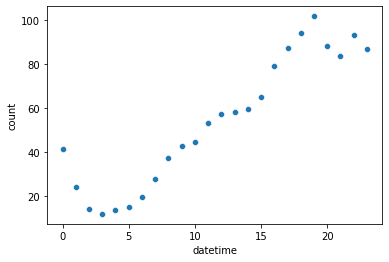

In [34]:
total_per_hour = dayafterNY[["datetime", "count"]].groupby([dayafterNY["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

Since the above is a Friday most people probably did a long weekend with NYE on WED and NYD being TH. COmparing the next weekday

<AxesSubplot:xlabel='datetime', ylabel='count'>

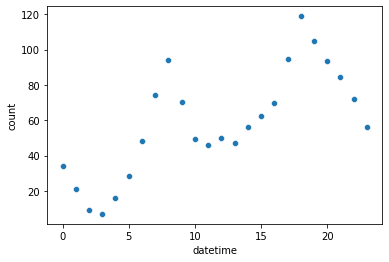

In [102]:
NYpDay = df[(df['date'] >= '2015-01-05') & (df['date'] < '2015-01-06')]
total_per_hour = NYpDay[["datetime", "count"]].groupby([NYpDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

# MLK Day

In [54]:
MLK = df[(df['date'] >= '2015-01-19') & (df['date'] < '2015-12-20')]

<AxesSubplot:xlabel='datetime', ylabel='count'>

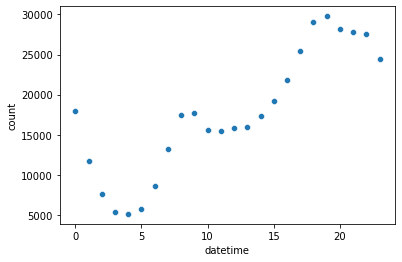

In [56]:
total_per_hour = MLK[["datetime", "count"]].groupby([MLK["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

In [61]:
MLKpDay = df[(df['date'] >= '2015-01-20') & (df['date'] < '2015-12-21')]

<AxesSubplot:xlabel='datetime', ylabel='count'>

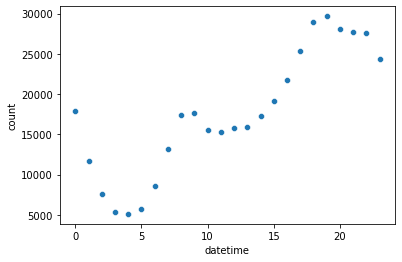

In [62]:
total_per_hour = MLKpDay[["datetime", "count"]].groupby([MLKpDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

No difference :( most people probably don't get the day off

# Presidents Day

<AxesSubplot:xlabel='datetime', ylabel='count'>

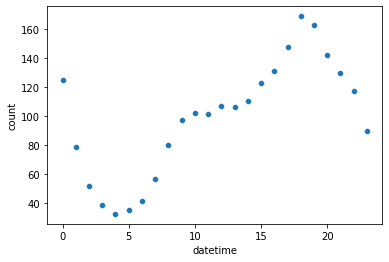

In [71]:
PresDay = df[(df['date'] >= '2015-02-16') & (df['date'] < '2015-02-17')]
total_per_hour = PresDay[["datetime", "count"]].groupby([PresDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

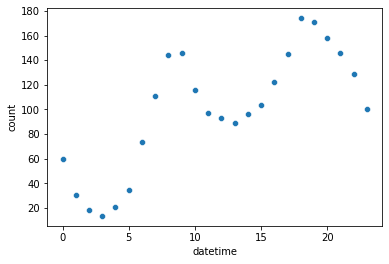

In [72]:
PrespDay = df[(df['date'] >= '2015-02-17') & (df['date'] < '2015-02-18')]
total_per_hour = PrespDay[["datetime", "count"]].groupby([PrespDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

Going to start doing a before on the weekday before since most of the holidays fall on a monday and we know weekend are different than weekdays.

<AxesSubplot:xlabel='datetime', ylabel='count'>

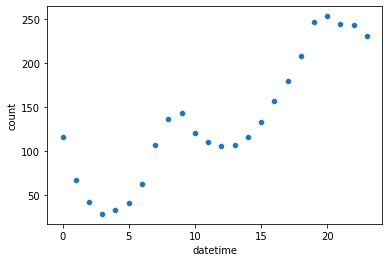

In [101]:
PresmDay = df[(df['date'] >= '2015-02-13') & (df['date'] < '2015-02-14')]
total_per_hour = PresmDay[["datetime", "count"]].groupby([PresmDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

# Memorial Day

2014

<AxesSubplot:xlabel='datetime', ylabel='count'>

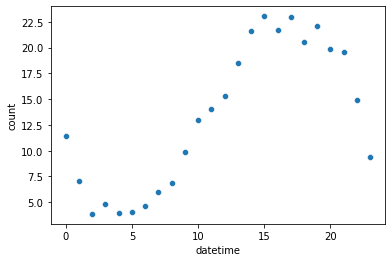

In [76]:
MemDay = df[(df['date'] >= '2014-05-26') & (df['date'] < '2014-05-27')]
total_per_hour = MemDay[["datetime", "count"]].groupby([MemDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

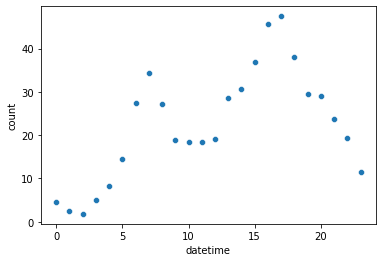

In [78]:
MempDay = df[(df['date'] >= '2014-05-27') & (df['date'] < '2014-05-28')]
total_per_hour = MempDay[["datetime", "count"]].groupby([MempDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

Below is Friday

<AxesSubplot:xlabel='datetime', ylabel='count'>

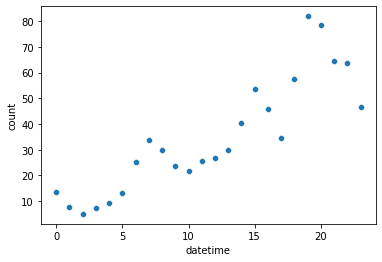

In [83]:
MemmDay = df[(df['date'] >= '2014-05-23') & (df['date'] < '2014-05-24')]
total_per_hour = MemmDay[["datetime", "count"]].groupby([MemmDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

disruption in the app? 

2015

<AxesSubplot:xlabel='datetime', ylabel='count'>

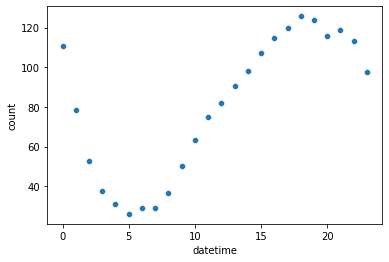

In [84]:
MemDay = df[(df['date'] >= '2015-05-25') & (df['date'] < '2015-05-26')]
total_per_hour = MemDay[["datetime", "count"]].groupby([MemDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

Cool that people tend to follow the same pattern in different years on the same holiday

<AxesSubplot:xlabel='datetime', ylabel='count'>

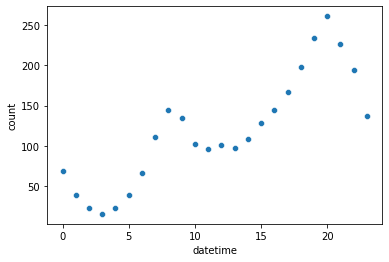

In [85]:
MempDay = df[(df['date'] >= '2015-05-27') & (df['date'] < '2015-05-28')]
total_per_hour = MempDay[["datetime", "count"]].groupby([MempDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

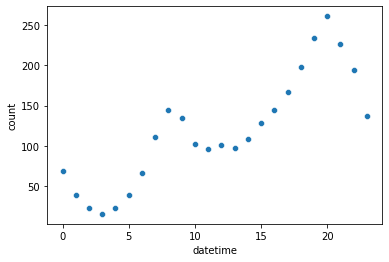

In [100]:
MemmDay = df[(df['date'] >= '2015-05-22') & (df['date'] < '2015-05-23')]
total_per_hour = MempDay[["datetime", "count"]].groupby([MempDay["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

# 4th of July

<AxesSubplot:xlabel='datetime', ylabel='count'>

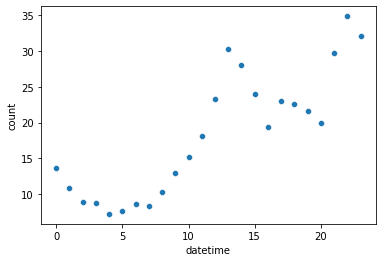

In [86]:
frth = df[(df['date'] >= '2014-07-04') & (df['date'] < '2014-07-05')]
total_per_hour = frth[["datetime", "count"]].groupby([frth["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

Next bussines day

<AxesSubplot:xlabel='datetime', ylabel='count'>

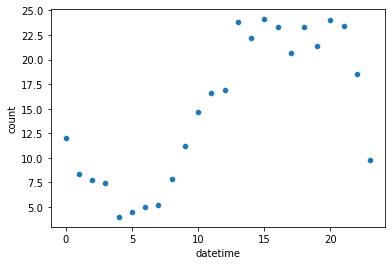

In [89]:
frthp = df[(df['date'] >= '2014-07-06') & (df['date'] < '2014-07-07')]
total_per_hour = frthp[["datetime", "count"]].groupby([frthp["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

I assume since 4th of July was on a Friday a lot of people took off the Monday also?? went with +2 days for this to get a normal day

<AxesSubplot:xlabel='datetime', ylabel='count'>

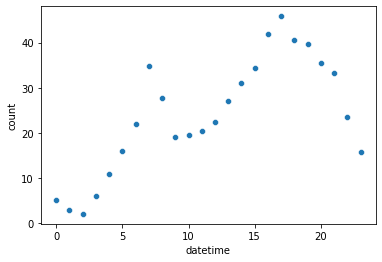

In [91]:
frthpp = df[(df['date'] >= '2014-07-07') & (df['date'] < '2014-07-08')]
total_per_hour = frthpp[["datetime", "count"]].groupby([frthpp["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

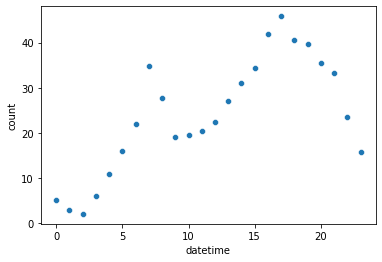

In [99]:
frthm = df[(df['date'] >= '2014-07-03') & (df['date'] < '2014-07-04')]
total_per_hour = frthpp[["datetime", "count"]].groupby([frthpp["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

Normal looking was curious to see if people got off early but probably as stated above since people got Monday off aswell looks like they continued to work as normal.

# Labor Day

<AxesSubplot:xlabel='datetime', ylabel='count'>

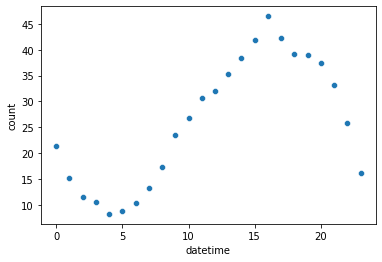

In [92]:
labday = df[(df['date'] >= '2014-09-01') & (df['date'] < '2014-09-02')]
total_per_hour = labday[["datetime", "count"]].groupby([labday["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

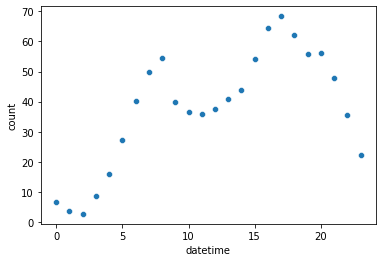

In [93]:
labdayp = df[(df['date'] >= '2014-09-02') & (df['date'] < '2014-09-03')]
total_per_hour = labdayp[["datetime", "count"]].groupby([labdayp["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

# 9/11

Just curious if traffic patterns might be altered due to it 

<AxesSubplot:xlabel='datetime', ylabel='count'>

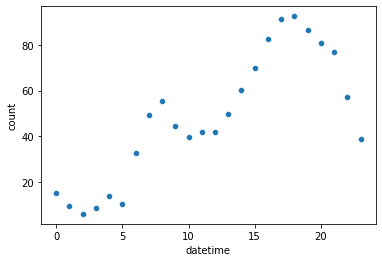

In [94]:
ninelv = df[(df['date'] >= '2014-09-11') & (df['date'] < '2014-09-12')]
total_per_hour = ninelv[["datetime", "count"]].groupby([ninelv["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

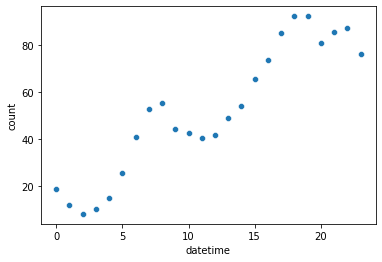

In [97]:
ninelvp = df[(df['date'] >= '2014-09-12') & (df['date'] < '2014-09-13')]
total_per_hour = ninelvp[["datetime", "count"]].groupby([ninelvp["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

<AxesSubplot:xlabel='datetime', ylabel='count'>

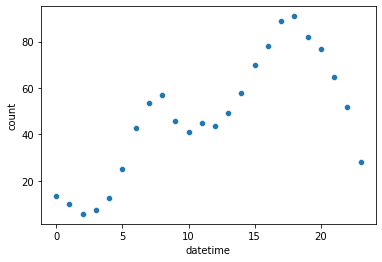

In [98]:
ninelvm = df[(df['date'] >= '2014-09-10') & (df['date'] < '2014-09-11')]
total_per_hour = ninelvm[["datetime", "count"]].groupby([ninelvm["datetime"].dt.hour]).sum()
average_per_hour = total_per_hour
average_per_hour["count"] = average_per_hour["count"] / 31
sns.scatterplot(data=average_per_hour, x = "datetime", y = "count")

No difference :/